In [60]:
from IPython.display import clear_output as clear
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

# load_boston() is deprecated

Loading the boston dataset directly from its source (http://lib.stat.cmu.edu/datasets/boston) and testing whether there's any difference in the datasets:

In [91]:
boston_data = load_boston()
data_from_deprecated_function = pd.DataFrame(data=boston_data.data, columns=boston_data.feature_names)
data_from_deprecated_function["PRICE"] = boston_data.target
clear()

In [96]:
import pandas as pd
import numpy as np
import urllib

data_url = "http://lib.stat.cmu.edu/datasets/boston"

raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]


file = urllib.request.urlopen(data_url)
columns = list(map(lambda x: x.split(' ')[1], [line.decode('utf-8') for line in file][7:20]))
data = pd.DataFrame(data=data, columns=columns)
data["PRICE"] = target

In [97]:
data.shape, data_from_deprecated_function.shape

((506, 14), (506, 14))

In [98]:
np.all(data==data_from_deprecated_function) # Every (all) element evaluates to true: both datasets are exactly the same

True

## Taking a look at the data

In [112]:
data['RAD'].unique()

array([ 1.,  2.,  3.,  5.,  4.,  8.,  6.,  7., 24.])

In [119]:
data[data['RAD']==24]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
356,8.98296,0.0,18.1,1.0,0.770,6.212,97.4,2.1222,24.0,666.0,20.2,377.73,17.60,17.8
357,3.84970,0.0,18.1,1.0,0.770,6.395,91.0,2.5052,24.0,666.0,20.2,391.34,13.27,21.7
358,5.20177,0.0,18.1,1.0,0.770,6.127,83.4,2.7227,24.0,666.0,20.2,395.43,11.48,22.7
359,4.26131,0.0,18.1,0.0,0.770,6.112,81.3,2.5091,24.0,666.0,20.2,390.74,12.67,22.6
360,4.54192,0.0,18.1,0.0,0.770,6.398,88.0,2.5182,24.0,666.0,20.2,374.56,7.79,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,2.81838,0.0,18.1,0.0,0.532,5.762,40.3,4.0983,24.0,666.0,20.2,392.92,10.42,21.8
484,2.37857,0.0,18.1,0.0,0.583,5.871,41.9,3.7240,24.0,666.0,20.2,370.73,13.34,20.6
485,3.67367,0.0,18.1,0.0,0.583,6.312,51.9,3.9917,24.0,666.0,20.2,388.62,10.58,21.2
486,5.69175,0.0,18.1,0.0,0.583,6.114,79.8,3.5459,24.0,666.0,20.2,392.68,14.98,19.1


# Visualising Data - Histograms, Distributions and Bar Charts

Color pallete: https://www.color-hex.com/color-palette/11416

In [189]:
# plt.rcParams['text.color'] = plt.rcParams['axes.labelcolor'] = plt.rcParams['xtick.color'] = plt.rcParams['ytick.color'] = "#11324D"
some_color = "#3d005b"
plt.rcParams.update({
    'text.color' : some_color,
    'axes.labelcolor' : some_color,
    'xtick.color' : some_color,
    'ytick.color' : some_color
})


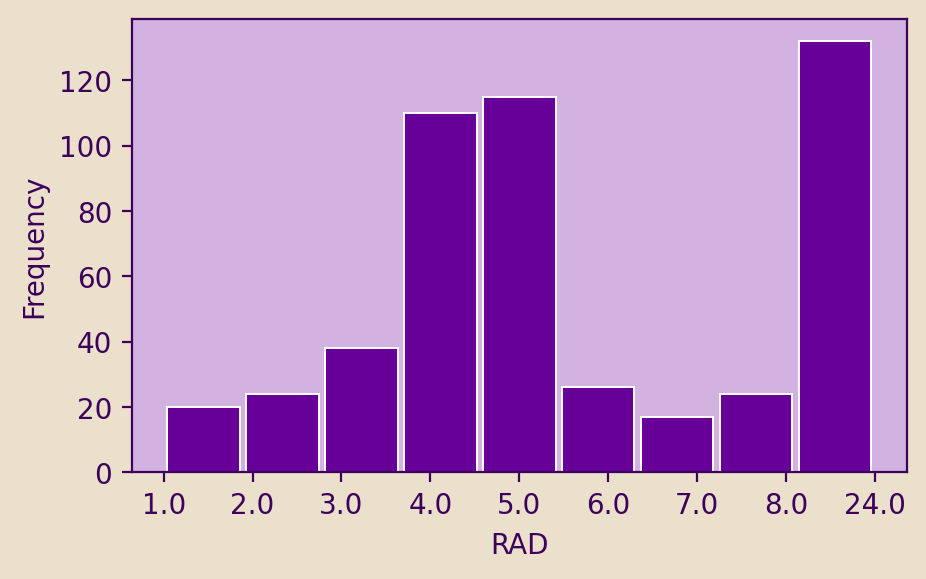

In [207]:
fig = plt.figure(figsize=(5, 3), facecolor='#eae0cc', dpi=200)
# fig.set_facecolor(color='#E7E0C9')


ax = plt.axes()
for spine in ax.spines:
    ax.spines[spine].set_color("#3d005b")
ax.set_facecolor(color='#d1b2e0')


# RAD: index of accessibility to radial highways
plt.hist(
    np.array(sorted(data["RAD"])).astype(str),
    bins=9, 
    ec="#ffffff", 
    color="#660099",
    rwidth=.92,
    linewidth=.7
)
plt.xlabel("RAD")
plt.ylabel("Frequency")

plt.show()

# Bar Chart

In [208]:
frequency = data['RAD'].value_counts()
frequency

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
2.0      24
8.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

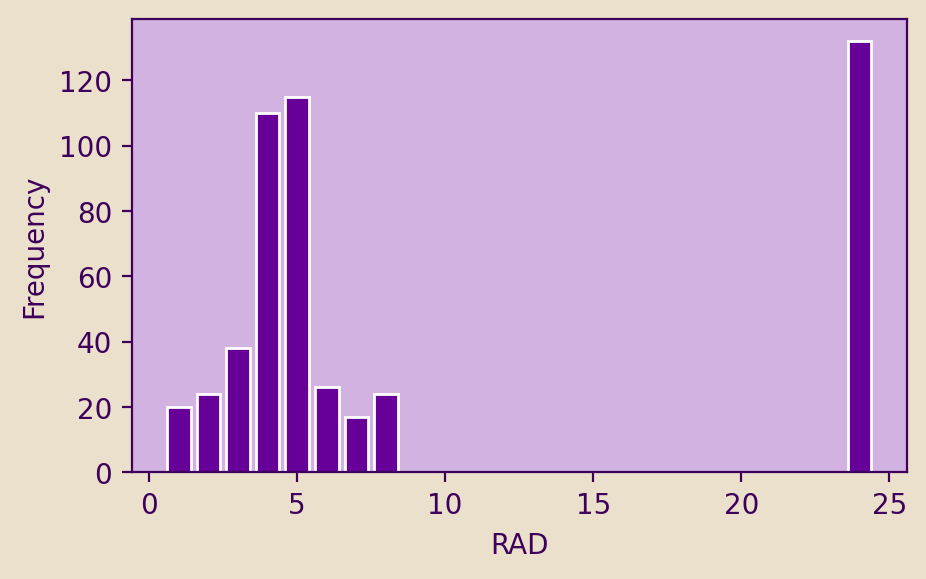

In [209]:
fig = plt.figure(figsize=(5, 3), facecolor='#eae0cc', dpi=200)

ax = plt.axes()
for spine in ax.spines:
    ax.spines[spine].set_color("#3d005b")
ax.set_facecolor(color='#d1b2e0')

plt.bar(
    frequency.index,
    frequency,
    ec="#ffffff", 
    color="#660099"
)
plt.xlabel("RAD")
plt.ylabel("Frequency")

plt.show()

# How many houses by the river?

In [214]:
data.columns #CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [217]:
data["CHAS"].unique()

array([0., 1.])

In [218]:
data["CHAS"].sum()

35.0

THe answer is: 35 houses by the river